In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, time
import seaborn as sns
%matplotlib inline

##City of Baltimore
## Crime Data from 2011-2016

## Preprocessing and EDA of the data

In [2]:
df= pd.read_csv('Crime_Rate_Data_Baltimore.csv')

In [3]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [4]:
df.tail()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
285802,01/01/2011,22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1
285803,01/01/2011,22:30:00,6J,3000 ODONNELL ST,LARCENY,I,NaN,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1
285804,01/01/2011,23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,O,NaN,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1
285805,01/01/2011,23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1
285806,01/01/2011,23:38:00,4D,800 N FREMONT AV,AGG. ASSAULT,I,HANDS,123.0,WESTERN,Upton,"(39.2981200000, -76.6339100000)",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        285807 non-null  object 
 1   CrimeTime        285807 non-null  object 
 2   CrimeCode        285807 non-null  object 
 3   Location         284184 non-null  object 
 4   Description      285807 non-null  object 
 5   Inside/Outside   281611 non-null  object 
 6   Weapon           97396 non-null   object 
 7   Post             285616 non-null  float64
 8   District         285749 non-null  object 
 9   Neighborhood     284106 non-null  object 
 10  Location 1       284188 non-null  object 
 11  Total Incidents  285807 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 26.2+ MB


In [6]:
df.isnull().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             1623
Description             0
Inside/Outside       4196
Weapon             188411
Post                  191
District               58
Neighborhood         1701
Location 1           1619
Total Incidents         0
dtype: int64

In [8]:
# fill in null values for weapon column with "no-evidence"
df['Weapon'].fillna("no-evidence", inplace=True)

In [10]:
# find the unique values of the 'Inside/Outside' column and unify them
df['Inside/Outside'].unique()

array(['O', 'I', 'Outside', 'Inside', nan], dtype=object)

In [11]:
df['Inside/Outside'].replace({"I":"Inside", "O":"Outside"}, inplace=True)

In [12]:
# change the military time with standard time/ change the dtype to date and time
for i in range(len(df)):
  if df.loc[i,'CrimeTime'][2] != ':':
    df.loc[i,'CrimeTime']= df.loc[i,'CrimeTime'][:2] + ":" + df.loc[i,'CrimeTime'][2:]

In [13]:
df['CrimeTime'].replace({'24:00':'00:24:00'}, inplace= True)

In [14]:
df['CrimeDateTime'] = df['CrimeDate'] + ' ' + df['CrimeTime']

In [15]:
df['CrimeDateTime']= pd.to_datetime(df['CrimeDateTime'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CrimeDate        285807 non-null  object        
 1   CrimeTime        285807 non-null  object        
 2   CrimeCode        285807 non-null  object        
 3   Location         284184 non-null  object        
 4   Description      285807 non-null  object        
 5   Inside/Outside   281611 non-null  object        
 6   Weapon           285807 non-null  object        
 7   Post             285616 non-null  float64       
 8   District         285749 non-null  object        
 9   Neighborhood     284106 non-null  object        
 10  Location 1       284188 non-null  object        
 11  Total Incidents  285807 non-null  int64         
 12  CrimeDateTime    285807 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 28.3+

In [17]:
df['CrimeTime']= pd.to_datetime(df['CrimeTime']).dt.time

In [18]:
df['CrimeDate']= pd.to_datetime(df['CrimeDate'])

In [19]:
df.sort_values(['CrimeDate', 'CrimeTime'], ascending= True, inplace=True)

In [20]:
df.set_index("CrimeDateTime", inplace=True)

In [ ]:
#df.dropna(inplace=True)

In [21]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
CrimeDateTime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01,00:00:00,6E,2700 HARLEM AV,LARCENY,Outside,no-evidence,721.0,WESTERN,Mosher,"(39.2956000000, -76.6615600000)",1
2011-01-01 00:00:00,2011-01-01,00:00:00,6G,0 E CROSS ST,LARCENY,Inside,no-evidence,942.0,SOUTHERN,Federal Hill,"(39.2769600000, -76.6133800000)",1
2011-01-01 00:01:00,2011-01-01,00:01:00,6J,0 E OSTEND ST,LARCENY,Inside,no-evidence,942.0,SOUTHERN,Federal Hill,"(39.2748200000, -76.6128000000)",1
2011-01-01 00:01:00,2011-01-01,00:01:00,6G,700 RAPPOLLA ST,LARCENY,Inside,no-evidence,242.0,SOUTHEASTERN,Greektown,"(39.2849900000, -76.5528100000)",1
2011-01-01 00:05:00,2011-01-01,00:05:00,4B,5200 MORAVIA RD,AGG. ASSAULT,Inside,KNIFE,443.0,NORTHEASTERN,Frankford,"(39.3235300000, -76.5496600000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-12 22:40:00,2016-11-12,22:40:00,7A,LN & LINDEN AV,AUTO THEFT,Outside,no-evidence,133.0,CENTRAL,Reservoir Hill,"(39.3159900000, -76.6361600000)",1
2016-11-12 22:47:00,2016-11-12,22:47:00,4E,3300 BRENDAN AVE,COMMON ASSAULT,Inside,HANDS,432.0,NORTHEASTERN,Belair-Edison,"(39.3214000000, -76.5685600000)",1
2016-11-12 23:30:00,2016-11-12,23:30:00,6D,5000 CORDELIA AVE,LARCENY FROM AUTO,Outside,no-evidence,613.0,NORTHWESTERN,Langston Hughes,"(39.3441500000, -76.6798000000)",1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 285807 entries, 2011-01-01 00:00:00 to 2016-11-12 23:54:00
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CrimeDate        285807 non-null  datetime64[ns]
 1   CrimeTime        285807 non-null  object        
 2   CrimeCode        285807 non-null  object        
 3   Location         284184 non-null  object        
 4   Description      285807 non-null  object        
 5   Inside/Outside   281611 non-null  object        
 6   Weapon           285807 non-null  object        
 7   Post             285616 non-null  float64       
 8   District         285749 non-null  object        
 9   Neighborhood     284106 non-null  object        
 10  Location 1       284188 non-null  object        
 11  Total Incidents  285807 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 28.3+ MB


In [23]:
df.isnull().sum()

CrimeDate             0
CrimeTime             0
CrimeCode             0
Location           1623
Description           0
Inside/Outside     4196
Weapon                0
Post                191
District             58
Neighborhood       1701
Location 1         1619
Total Incidents       0
dtype: int64

##General Questions

## 1) How many total incidents are recorded in the dataset?

In [24]:
total_inc= df['Total Incidents'].sum()

In [26]:
print(f"Total Incidents are : {total_inc}")

Total Incidents are : 285807


## 2) What is the earliest crimedate in the dataset?

In [28]:
earliest = df['CrimeDate'].min()
print(f"Earliest crimedate is : {earliest}")

Earliest crimedate is : 2011-01-01 00:00:00


##3) What is the latest crimedate in the dataset?

In [29]:
latest= df['CrimeDate'].max()
print(f"Latest crimedate is : {latest}")

Latest crimedate is : 2016-11-12 00:00:00


##Questions about Types of Crime

## 1) What are the unique crimecodes listed in the dataset?

In [30]:
df['CrimeCode'].unique()

array(['6E', '6G', '6J', '4B', '6D', '5D', '4D', '4C', '4E', '7A', '5A',
       '1K', '6B', '3AF', '5C', '4A', '9S', '3B', '2A', '7C', '6C', '5B',
       '3CK', '3JF', '1F', '8J', '3CF', '3AK', '6H', '2B', '3EK', '6A',
       '3JK', '3GF', '4F', '3LF', '6F', '3K', '6L', '8FO', '8H', '3P',
       '3AJF', '3D', '3AO', '8AO', '3CO', '5F', '3LO', '3NF', '3F', '7B',
       '5E', '3AJK', '8AV', '3AJO', '3M', '8BO', '3JO', '3BJ', '3EF',
       '1O', '3H', '3NO', '3NK', '8EO', '8GO', '8BV', '3GK', '8I', '3GO',
       '8CO', '3EO', '8GV', '6K', '8FV', '8CV', '8EV', '3N', '8DO', '3LK'],
      dtype=object)

In [31]:
df['CrimeCode'].nunique()

81

## 2) Which crimecode has the highest occurrence?

In [32]:
df['CrimeCode'].value_counts().idxmax()

'4E'

## 3) How many incidents involved weapons?

In [35]:
filt0= df['Weapon']== 'no-evidence'
involved_weapons= df['Weapon'].loc[~filt0].value_counts().sum()
print(f"Incidents involved weapons = {involved_weapons}")

Incidents involved weapons = 97396


##Time-Based Questions

## 1) How many crimes occurred between 9:00 AM and 5:00 PM?

In [36]:
from datetime import datetime

start = datetime.strptime('09:00:00', '%H:%M:%S').time()
end = datetime.strptime('17:00:00', '%H:%M:%S').time()

In [37]:
filt1= (df['CrimeTime']>= start) & (df['CrimeTime']<= end)

In [40]:
df['Total Incidents'].loc[filt1].value_counts()

1    112323
Name: Total Incidents, dtype: int64

## 2) What day of the week has the most recorded incidents?

In [41]:
df['DayofWeek']= df['CrimeDate'].dt.day_name()

In [166]:
day_most=df['DayofWeek'].value_counts()

In [42]:
df['DayofWeek'].value_counts().idxmax()

'Friday'

Friday       43312
Monday       41752
Wednesday    40810
Tuesday      40787
Thursday     40442
Saturday     40359
Sunday       38345
Name: DayofWeek, dtype: int64

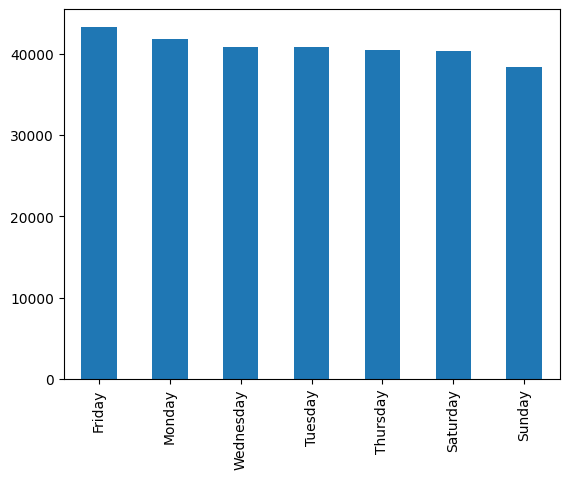

In [174]:
day_most.plot(kind= 'bar')
day_most

## 3) Which season (winter, summer, autumn, spring) had the least and most incidents?

In [43]:
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [44]:
df['season'] = df['CrimeDate'].map(season_of_date)

<ipython-input-43-d4db810e8ad4>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
<ipython-input-43-d4db810e8ad4>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
<ipython-input-43-d4db810e8ad4>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}


In [45]:
season_most_inc= df['season'].value_counts().idxmax()
print(f"The season with the most incedents is: {season_most_inc}")

The season with the most incedents is: summer


In [46]:
season_least_inc= df['season'].value_counts().idxmin()
print(f"The season with the least incedents is: {season_least_inc}")

The season with the least incedents is: winter


In [188]:
season_inc= df['season'].value_counts()

In [189]:
season_inc

summer    80885
spring    75726
autumn    68315
winter    60881
Name: season, dtype: int64

<Axes: >

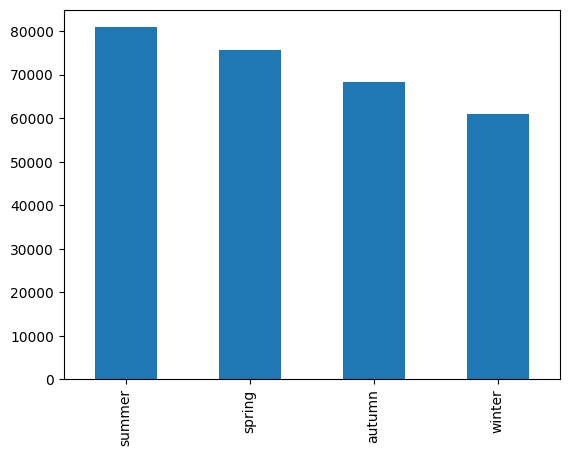

In [196]:
season_inc.plot(kind= 'bar')

## 4) Are there specific crimetimes that have a higher frequency of incidents?

In [199]:
spec_time= df['CrimeTime'].value_counts().head(50)

In [203]:
spec_time

18:00:00    7171
17:00:00    6856
16:00:00    6397
20:00:00    6218
12:00:00    6213
21:00:00    6008
15:00:00    5980
19:00:00    5961
22:00:00    5788
14:00:00    4971
23:00:00    4748
13:00:00    4545
09:00:00    4301
08:00:00    4239
10:00:00    4174
11:00:00    3637
18:30:00    3216
15:30:00    3185
16:30:00    3061
17:30:00    3044
21:30:00    2987
20:30:00    2950
19:30:00    2949
22:30:00    2818
00:00:00    2741
01:00:00    2699
07:00:00    2657
02:00:00    2425
14:30:00    2399
23:30:00    2355
12:30:00    2322
08:30:00    2173
13:30:00    2173
11:30:00    2144
01:01:00    2065
10:30:00    2058
09:30:00    1849
07:30:00    1747
03:00:00    1735
00:30:00    1733
00:01:00    1598
06:00:00    1525
01:30:00    1509
02:30:00    1270
04:00:00    1176
05:00:00    1135
06:30:00     993
15:45:00     857
15:15:00     827
03:30:00     798
Name: CrimeTime, dtype: int64

<Axes: >

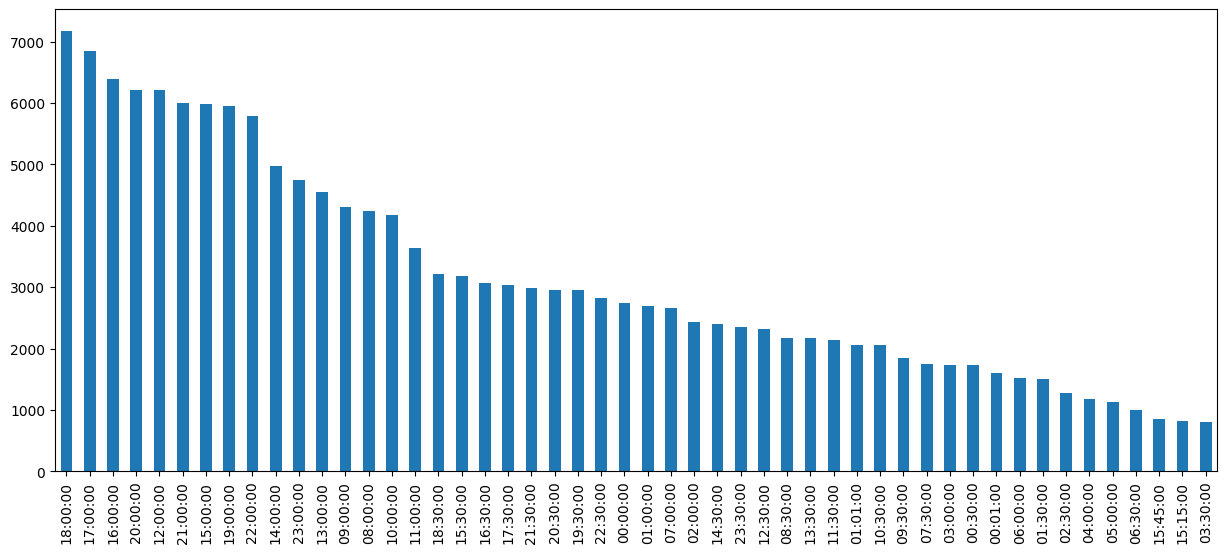

In [202]:
spec_time.plot(kind= 'bar', figsize= (15, 6))

In [48]:
df['CrimeTime'].mode()

0    18:00:00
Name: CrimeTime, dtype: object

## 5) When do most inside crimes happen during the day?

In [49]:
mask1 = df['Inside/Outside']== 'Outside'

In [50]:
df_inside= df[~mask1]

In [63]:
start = datetime.strptime('06:00:00', '%H:%M:%S').time()
end = datetime.strptime('17:00:00', '%H:%M:%S').time()

In [64]:
filt2=  (df_inside['CrimeTime']>= start) & (df_inside['CrimeTime']<= end)

In [65]:
df_inside['CrimeTime'].loc[filt2].mode()

0    12:00:00
Name: CrimeTime, dtype: object

In [56]:
inside_outside_group= df.groupby(['Inside/Outside'])

In [57]:
df_inside2= inside_outside_group.get_group('Inside')

In [61]:
filt3=  (df_inside2['CrimeTime']>= start) & (df_inside2['CrimeTime']<= end)

In [62]:
df_inside2['CrimeTime'].loc[filt3].mode()

0    12:00:00
Name: CrimeTime, dtype: object

##Location-Based Questions

## 1) What are the top 5 locations where crimes occurred?

In [68]:
df['Location'].value_counts().head()

200 E PRATT ST     676
300 LIGHT ST       603
1500 RUSSELL ST    439
3200 TIOGA PW      438
1200 W PRATT ST    387
Name: Location, dtype: int64

## 2) Which district has the highest number of incidents?

In [69]:
df['District'].value_counts().idxmax()

'NORTHEASTERN'

## 3) Are there any neighborhoods that appear to be particularly safe or particularly at-risk?

In [72]:
risk= df['Neighborhood'].value_counts().idxmax()
print(f"{risk} is a risk place to go.")

Downtown is a risk place to go.


In [73]:
safe= df['Neighborhood'].value_counts().idxmin()
print(f"{safe} is a safe place to go.")

Dundalk Marine Terminal is a safe place to go.


In [204]:
neigh_risk= df['Neighborhood'].value_counts()

In [205]:
neigh_risk

Downtown                   9666
Frankford                  6791
Belair-Edison              6133
Brooklyn                   4528
Cherry Hill                4273
                           ... 
Mt Pleasant Park             12
Blythewood                    5
Dundalk Marine Terminal       1
NORTHEASTERN                  1
EASTERN                       1
Name: Neighborhood, Length: 280, dtype: int64

##Descriptive Questions

## 1) What are the most common descriptions for crimes in the dataset?

In [74]:
df['Description'].value_counts()

LARCENY                 62623
COMMON ASSAULT          47881
BURGLARY                44977
LARCENY FROM AUTO       39024
AGG. ASSAULT            27931
AUTO THEFT              27093
ROBBERY - STREET        17050
ROBBERY - COMMERCIAL     3926
ASSAULT BY THREAT        3581
ROBBERY - RESIDENCE      2986
SHOOTING                 2742
RAPE                     1709
ARSON                    1535
HOMICIDE                 1470
ROBBERY - CARJACKING     1279
Name: Description, dtype: int64

In [75]:
df['Description'].mode()

0    LARCENY
Name: Description, dtype: object

## 2) How often did crimes occur inside versus outside?

In [76]:
from unicodedata import normalize
df['Inside/Outside'].value_counts(normalize)

Inside     0.506127
Outside    0.493873
Name: Inside/Outside, dtype: float64

##Weapon-Based Questions

## 1) What types of weapons are most commonly used in crimes?

In [79]:
df['Weapon'].loc[~filt0].value_counts(normalize)

HANDS      0.530730
FIREARM    0.217483
OTHER      0.149185
KNIFE      0.102602
Name: Weapon, dtype: float64

In [211]:
weapon_type= df['Weapon'].loc[~filt0].value_counts(normalize)

<Axes: ylabel='Weapon'>

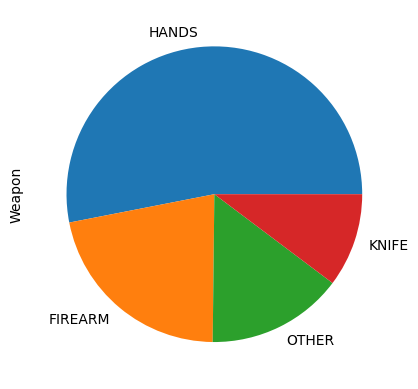

In [212]:
weapon_type.plot(kind= 'pie')

In [80]:
df['Weapon'].loc[~filt0].mode()

0    HANDS
Name: Weapon, dtype: object

##Questions Regarding Law Enforcement

## 1) Are there specific police posts that have a higher number of incidents reported?

In [215]:
df['Post'].value_counts()

111.0    9776
212.0    4982
922.0    4655
211.0    4513
913.0    4470
         ... 
0.7         1
0.6         1
2.1         1
1.2         1
1.0         1
Name: Post, Length: 189, dtype: int64

In [216]:
df['Post'].mode()

0    111.0
Name: Post, dtype: float64

##Combined Queries

## 1) Are incidents involving weapons more likely to occur inside or outside?

In [82]:
mask = df['Weapon']== 'no-evidence'

In [83]:
df_weapon= df[~mask]

In [84]:
df_weapon['Inside/Outside'].value_counts(normalize)

Inside     0.527542
Outside    0.472458
Name: Inside/Outside, dtype: float64

## 2) In which district and neighborhood combination do the most violent crimes (based on description or weapon used) occur?

In [101]:
grouped = df.groupby(['District', 'Neighborhood'])['Weapon'].value_counts()

In [220]:
grouped

District  Neighborhood  Weapon     
CENTRAL   Barclay       no-evidence    40
                        HANDS           7
                        FIREARM         3
                        KNIFE           2
                        OTHER           2
                                       ..
WESTERN   Upton         KNIFE           1
          Walbrook      no-evidence    15
                        HANDS           4
                        KNIFE           2
                        OTHER           1
Name: Weapon, Length: 1682, dtype: int64

In [103]:
grouped.idxmax()

('CENTRAL', 'Downtown', 'no-evidence')

In [104]:
grouped2 = df.groupby(['District', 'Neighborhood'])['Description'].value_counts()

In [105]:
grouped2

District  Neighborhood  Description      
CENTRAL   Barclay       LARCENY FROM AUTO    19
                        LARCENY               8
                        COMMON ASSAULT        7
                        AUTO THEFT            6
                        BURGLARY              6
                                             ..
WESTERN   Walbrook      BURGLARY              9
                        AUTO THEFT            6
                        COMMON ASSAULT        4
                        AGG. ASSAULT          2
                        HOMICIDE              1
Name: Description, Length: 4412, dtype: int64

In [106]:
grouped2.idxmax()

('CENTRAL', 'Downtown', 'LARCENY')

## 3) Is there a seasonal trend in the types of crimes committed (e.g., more thefts in summer)?

In [162]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents,DayofWeek,season,year
CrimeDateTime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01,00:00:00,6E,2700 HARLEM AV,LARCENY,Outside,no-evidence,721.0,WESTERN,Mosher,"(39.2956000000, -76.6615600000)",1,Saturday,winter,2011
2011-01-01 00:00:00,2011-01-01,00:00:00,6G,0 E CROSS ST,LARCENY,Inside,no-evidence,942.0,SOUTHERN,Federal Hill,"(39.2769600000, -76.6133800000)",1,Saturday,winter,2011
2011-01-01 00:01:00,2011-01-01,00:01:00,6J,0 E OSTEND ST,LARCENY,Inside,no-evidence,942.0,SOUTHERN,Federal Hill,"(39.2748200000, -76.6128000000)",1,Saturday,winter,2011
2011-01-01 00:01:00,2011-01-01,00:01:00,6G,700 RAPPOLLA ST,LARCENY,Inside,no-evidence,242.0,SOUTHEASTERN,Greektown,"(39.2849900000, -76.5528100000)",1,Saturday,winter,2011
2011-01-01 00:05:00,2011-01-01,00:05:00,4B,5200 MORAVIA RD,AGG. ASSAULT,Inside,KNIFE,443.0,NORTHEASTERN,Frankford,"(39.3235300000, -76.5496600000)",1,Saturday,winter,2011


In [137]:
df['year']= df['CrimeDate'].dt.year

In [138]:
df['year']

CrimeDateTime
2011-01-01 00:00:00    2011
2011-01-01 00:00:00    2011
2011-01-01 00:01:00    2011
2011-01-01 00:01:00    2011
2011-01-01 00:05:00    2011
                       ... 
2016-11-12 22:40:00    2016
2016-11-12 22:47:00    2016
2016-11-12 23:30:00    2016
2016-11-12 23:40:00    2016
2016-11-12 23:54:00    2016
Name: year, Length: 285807, dtype: int64

In [151]:
trend= df.groupby(['year','season', 'Description'])['Total Incidents'].sum()

In [157]:
trend.head(50)

year  season  Description         
2011  autumn  AGG. ASSAULT            1185
              ARSON                     81
              ASSAULT BY THREAT        156
              AUTO THEFT              1025
              BURGLARY                2441
              COMMON ASSAULT          2355
              HOMICIDE                  41
              LARCENY                 2661
              LARCENY FROM AUTO       1848
              RAPE                      83
              ROBBERY - CARJACKING      47
              ROBBERY - COMMERCIAL     182
              ROBBERY - RESIDENCE      125
              ROBBERY - STREET         676
              SHOOTING                  83
      spring  AGG. ASSAULT            1386
              ARSON                     80
              ASSAULT BY THREAT        193
              AUTO THEFT              1090
              BURGLARY                2013
              COMMON ASSAULT          2668
              HOMICIDE                  62
              LARCE

<Axes: xlabel='year,season,Description'>

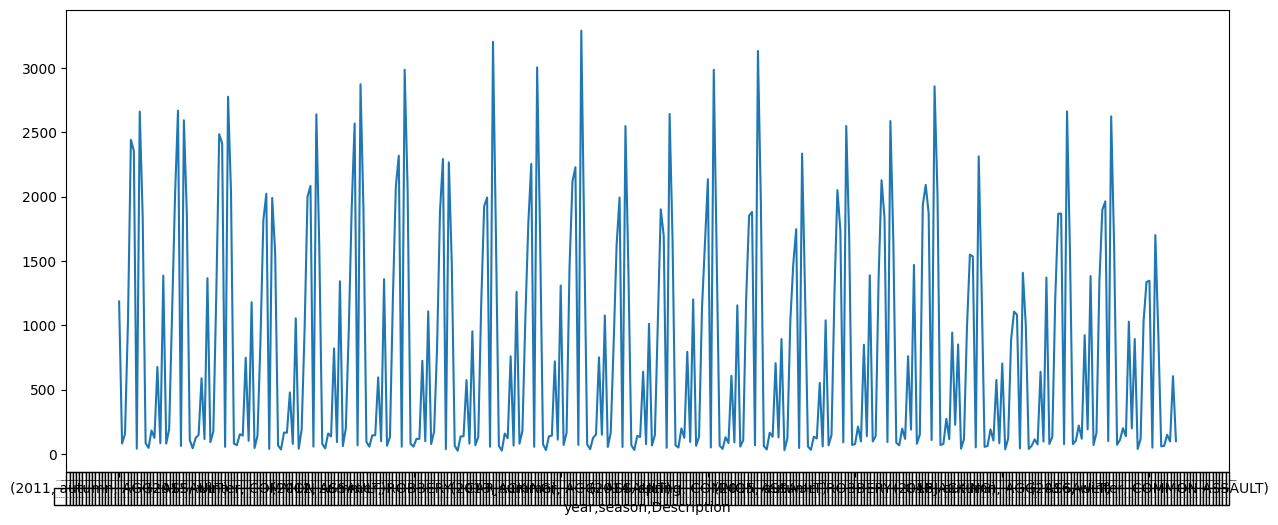

In [187]:
trend.plot(table= True, figsize= (15, 6))